House Prices Prediction Project

Dataset

In [379]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')

df = pd.read_csv(r"D:\Python Course\House Prices Predict\data\Housing.csv").dropna(how='any')
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

Text(0, 0.5, 'House')

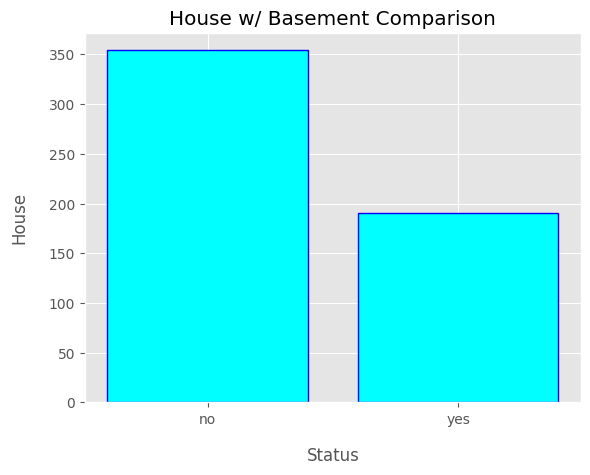

In [380]:
basement = df["basement"].value_counts()
basement

plt.bar(basement.index, basement.values, color="cyan", edgecolor="blue", linewidth=1)
plt.title("House w/ Basement Comparison")
plt.xlabel("Status", labelpad=15)
plt.ylabel("House", labelpad=15)

Data Splitting

In [381]:
Xa = df[['area','bedrooms', 'bathrooms', 'stories', 'parking']]
Xb = df[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']]
y = df['price']
X = pd.concat([Xa, Xb], axis=1)

Data Preprocessing

In [382]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

In [383]:
# Encoder Data

numFeatures = Xa.columns
catFeatures = Xb.columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numFeatures),
        ('cat', OneHotEncoder(handle_unknown='ignore'), catFeatures)
    ]
)

X_processed = preprocessor.fit_transform(X)

Train Test Splitting

In [384]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, random_state=42, test_size=0.4)

Model Training

#1 Linear Regression

In [385]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

Linear Regression Evaluate

In [386]:
from sklearn.metrics import r2_score
yPredA = linreg.predict(X_test)
r2Linreg = r2_score(y_test, yPredA)
print(f"Linear Regression Model R2 Score:{r2Linreg}")

Linear Regression Model R2 Score:0.675496808516109


#2 KNN Regressor

In [387]:
from sklearn.neighbors import KNeighborsRegressor
n = 5
Knr = KNeighborsRegressor(n_neighbors=n)
Knr.fit(X_train, y_train)

KNeighborsRegressor()

KNN Regressor Evaluate

In [388]:
yPredB = Knr.predict(X_test)
r2Knr = r2_score(y_test, yPredB)
print(f"KNN Regressor Model R2 Score: {r2Knr}") 

KNN Regressor Model R2 Score: 0.55371365014098


#3 Random Forest Regressor

In [389]:
from sklearn.ensemble import RandomForestRegressor
Rfr = RandomForestRegressor(random_state=42)
Rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Random Forest Regressor Evaluate

In [391]:
yPredC = Rfr.predict(X_test)
r2Rfr = r2_score(y_test, yPredC)
print(f"Random Forest Regressor Model R2 Score: {r2Rfr}")

Random Forest Regressor Model R2 Score: 0.6263168991010192


R2 Score Summary

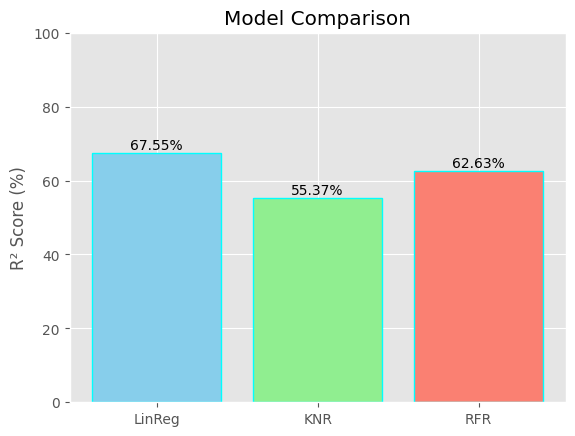

In [429]:
# Summary
r2Summary = {
    "LinReg":[round(r2Linreg*100, 2)],
    "KNR":[round(r2Knr*100, 2)],
    "RFR":[round(r2Rfr*100, 2)]
}
r2Summary = pd.DataFrame(r2Summary)

scores = r2Summary.iloc[0]
models = r2Summary.columns

plt.bar(r2Summary.columns, r2Summary.iloc[0], color=['skyblue', 'lightgreen', 'salmon'], edgecolor='cyan', linewidth=1)
plt.ylabel("R² Score (%)")
plt.title("Model Comparison")
plt.ylim(0, 100)


for i, v in enumerate(scores):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center')  # annotate values
plt.show()